<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe2-MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. La eficiencia en ordenamiento - MergeSort**

El Mergesort es un algoritmo de ordenamiento para listas. Se basa en la estrategia de **divide y vencerás**, donde realiza comparaciones para ordenar las listas. El algoritmo deja los elementos de entrada, pero permutados en un orden ascendente.

El algoritmo fue inventado por **John von Neumann** en 1945. 


![image](https://th.bing.com/th/id/R.e870db8fcc96292e8002646a56458d30?rik=ZnYpU7uDjCW4tA&riu=http%3a%2f%2fwww.alwayslearn.com%2fComputer+Algorithms%2fimages%2fMergesort.png&ehk=W5mL5P9bnHmAchY%2fY%2fjPAdHBt%2bKiouSXMh3f3mCO%2fS8%3d&risl=&pid=ImgRaw&r=0)

**(Imagen sacada de internet)**

El algoritmo empieza con una lista de tamaño **'n'** y luego va aplicando su lógica. Se espera:

**Entrada**: Secuencia de 'n' elementos en una lista $<a_1,a_2,…a_n>$ 

**Salida**: Permutación ordenada de la lista con los mismos **'n'** elementos $<a_1',a_2',…a_n'>$ tal que $[a_1'\leq a_2' \leq… \leq a_n']$

# **2. Descripción del algoritmo**

El algoritmo MergeSort realiza llamadas recursivas para ordenar **'fracciones'** de la lista. Según la función propuesta debemos ir acortando el rango de nuestra lista hasta un caso base para empezar a ordenar los elementos que esta contiene.

##2.1 Como se aplica el paradigma, divide y vencerás en MergeSort

El paradigma divide y vencerás se compone de tres puntos principales:

 * Divide.
 * Resuelve.
 * Combina.

En MergeSort se aplica de la siguiente forma:

* Divide **el problema más grande en subproblemas.**
* Resuelve **cada subproblema con recursividad.**
* Combina **los resultados para obtener el problema original.**

##2.2 Descripción general de MergeSort

En una lista de **'n'** elementos que comienza con índice 0 y el tamaño del arreglo menos uno:

1. La lista se va dividiendo en n/2 (generando sub-arreglos o sub-listas) entre los rangos traspasados, hasta llegar a la unidad.

2. Como cada una de estas partes son de tamaño 1, se considera que están ordenadas, pero siguen siendo considerados una lista.

2. Luego, son comparados los elementos de ambas sub-lista (a[0:tamaño sub-lista] <= b[0:tamaño sub-lista]) e insertados en la lista original, dependiendo de cuál sea el menor.

3. El proceso se va repitiendo hasta devolver la lista con los mismos elementos, pero ordenados.

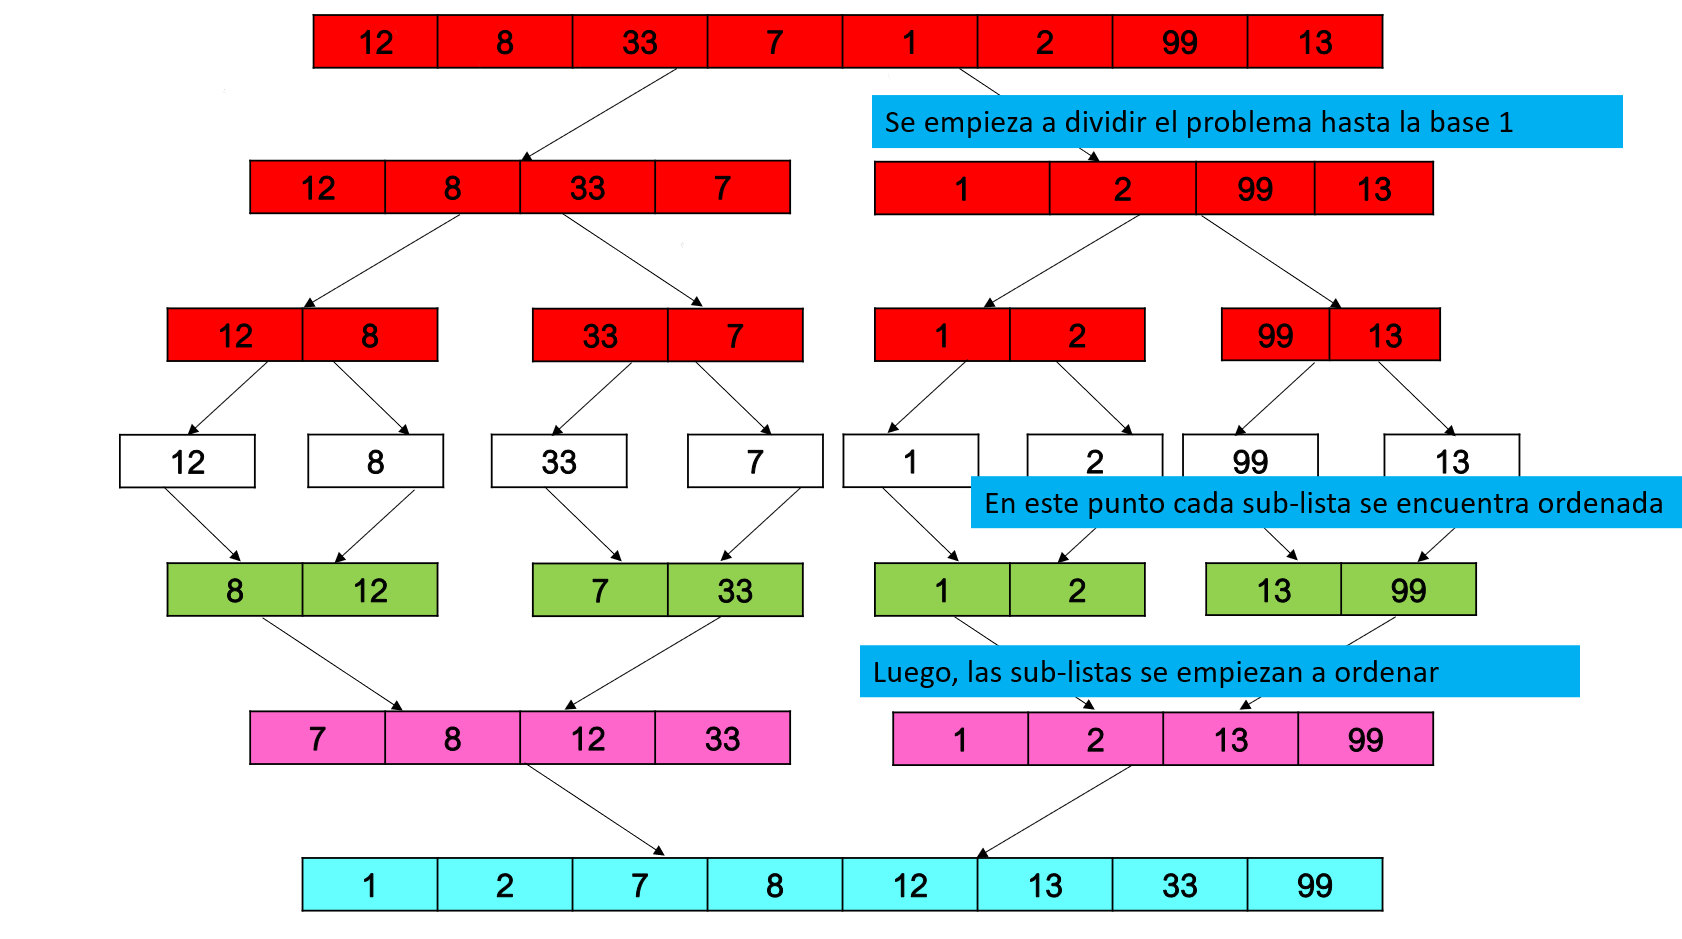

##2.3. Código MergeSort

Implementación del algoritmo MergeSort, basándose en la función propuesta en la guía.

In [2]:
from termcolor import colored

In [3]:
#Función MergeSort propuesta en la guía

def MergeSort(A, p, r,Verbose = False):
  global llamadaRecursiva
  llamadaRecursiva+=1
  if p==r: return

  q = int((p+r)/2) #elemento medio del arreglo
  MergeSort(A,p,q,Verbose) #ordena la parte izquierda del arreglo
  MergeSort(A,q+1,r,Verbose) #ordena la parte derecha del arreglo
  Merge(A,p,q,r,Verbose) #combina y ordena ambos subarreglos ordenados

In [45]:
#Función Merge

def Merge(A,p,q,r,Verbose=False):
  global contador
  #Creo dos listas auxiliares
  A1 = A[p:q+1]
  A2 = A[q+1:r+1]
  #Indices para ir moviendose en ambas listas respectivamente
  izq = 0
  der = 0
  
  for i in range(p,r+1):
    if Verbose == True:
      print("-----------------------------------------------")

    ##Ciclos para rellenar valores faltantes en alguna lista
    if izq == len(A1):
      for k in range(i,r+1):
        A[k] = A2[der]
        der+=1
        contador+=1
      break
    if der == len(A2):
      for k in range(i,r+1):
        A[k] = A1[izq]
        izq+=1
        contador+=1
      break

    ##Comparacion de elementos de las listas
    contador+=1
    if A1[izq] <= A2[der]:
      A[i] = A1[izq]
      izq+=1
    else:
      A[i] = A2[der]
      der+=1
    if Verbose==True:
      print("Comparación entre sub-listas...")
      print("Sub-listas:",A[:p],colored(A[p:q+1],"blue"),colored(A[q+1:r+1],"red"),A[r+1:])
      print("-----------------------------------------------")
  if Verbose == True:
    print("Resultado final:",A)
    

## Ejemplo de entrada y salida

In [46]:
A = [1,2,3,6,1,3]

global contador
global llamadaRecursiva
llamadaRecursiva = 0
contador = 0

print("Lista de entrada: ",A)
MergeSort(A,0,len(A)-1,Verbose=False)
print("Lista de salida: ",A)
print("Comparaciones:",contador)
print("Llamadas recursivas:",llamadaRecursiva)

Lista de entrada:  [1, 2, 3, 6, 1, 3]
Lista de salida:  [1, 1, 2, 3, 3, 6]
Comparaciones: 16
Llamadas recursivas: 11


##2.4. Ejemplo paso a paso

Veamos en pasos sencillos lo que hace el MergeSort teniendo la siguiente lista:

      z = [4,13,1,86,45]

1. La función recursiva se va llamando hasta llegar a la unidad, donde se considera que las listas están ordenadas

        z = [ 4 ]  [ 13 ]  [ 1 , 86 , 45 ]

2. Se van ordenando y recursivamente se llama otra vez al MergeSort para ordenar otras partes del arreglo

        z = [ 4 , 13 ]  [ 1 ]  [ 86 , 45 ]

        z = [ 1 , 4 , 13 ] [ 86 ] [ 45 ]

        z = [ 1 , 4 , 13 ] [ 45 , 86 ]

3. Finalmente, nos queda un solo arreglo ordenado de menor a mayor y con sus elementos originales.

        z = [ 1 , 4 , 13 , 45 , 86 ]

##2.5. Ejecución del algoritmo con Verbose = True

Al pasar Verbose con valor **True** podemos observar los pasos que realiza el MergeSort dentro de la función Merge. 

In [6]:
import random

In [47]:
global contador
global llamadaRecursiva
llamadaRecursiva = 0
contador = 0
B = random.sample(range(1, 100), 5)
print("Lista de entrada: ",B)
MergeSort(B,0,len(B)-1,Verbose=True)
print("Lista de salida: ",A)
print("Total de comparaciones: ",contador)
print("Total de llamadas recursivas: ",llamadaRecursiva)

Lista de entrada:  [48, 8, 26, 43, 89]
-----------------------------------------------
Comparación entre sub-listas...
Sub-listas: [] [8] [8] [26, 43, 89]
-----------------------------------------------
-----------------------------------------------
Resultado final: [8, 48, 26, 43, 89]
-----------------------------------------------
Comparación entre sub-listas...
Sub-listas: [] [8, 48] [26] [43, 89]
-----------------------------------------------
-----------------------------------------------
Comparación entre sub-listas...
Sub-listas: [] [8, 26] [26] [43, 89]
-----------------------------------------------
-----------------------------------------------
Resultado final: [8, 26, 48, 43, 89]
-----------------------------------------------
Comparación entre sub-listas...
Sub-listas: [8, 26, 48] [43] [89] []
-----------------------------------------------
-----------------------------------------------
Resultado final: [8, 26, 48, 43, 89]
-----------------------------------------------

# **3. Propiedades del algoritmo**

A continuación, se explicará las correctitud de la función Merge y MergeSort, además de tener un análisis del tiempo de ejecución en MergeSort



##3.1 Correctitud Merge

Teorema: El algoritmo Merge genera una lista ordenada a partir de otras sub-litas de entrada, de modo que, sus elementos quedan ordenador de menor a mayor $[a_1'\leq a_2' \leq… \leq a_n']$

En la demostración de la función Merge usaremos la **invariante de bucle** con una explicación basada en demostración propuesta en el libro "Introduction to Algorithms".

---
**Inicialización:** Al comienzo de la función Merge y antes de iniciar el bucle que hará el proceso de ordenamiento, tenemos un arreglo que va desde **p** y finaliza en **r**, por tanto, el arreglo G se mueve entre G[p...r+1], de aquí se crean dos arreglos temporales que llamaremos **Left** y **Right**, los cuales están ordenados (Esto se asegura por la siguiente razón, las sucesivas llamadas recursivas de la función MergeSort dejan el rango que hay entre p y r en 1, por ende, cuando tenemos en Left y Right un elemento se asegura que está ordenado) y se mueven entre el rango de entrada, o sea Left[p...k+1] y Right[k+1...r+1], donde k es la mitad que hay entre **p** y **r**.





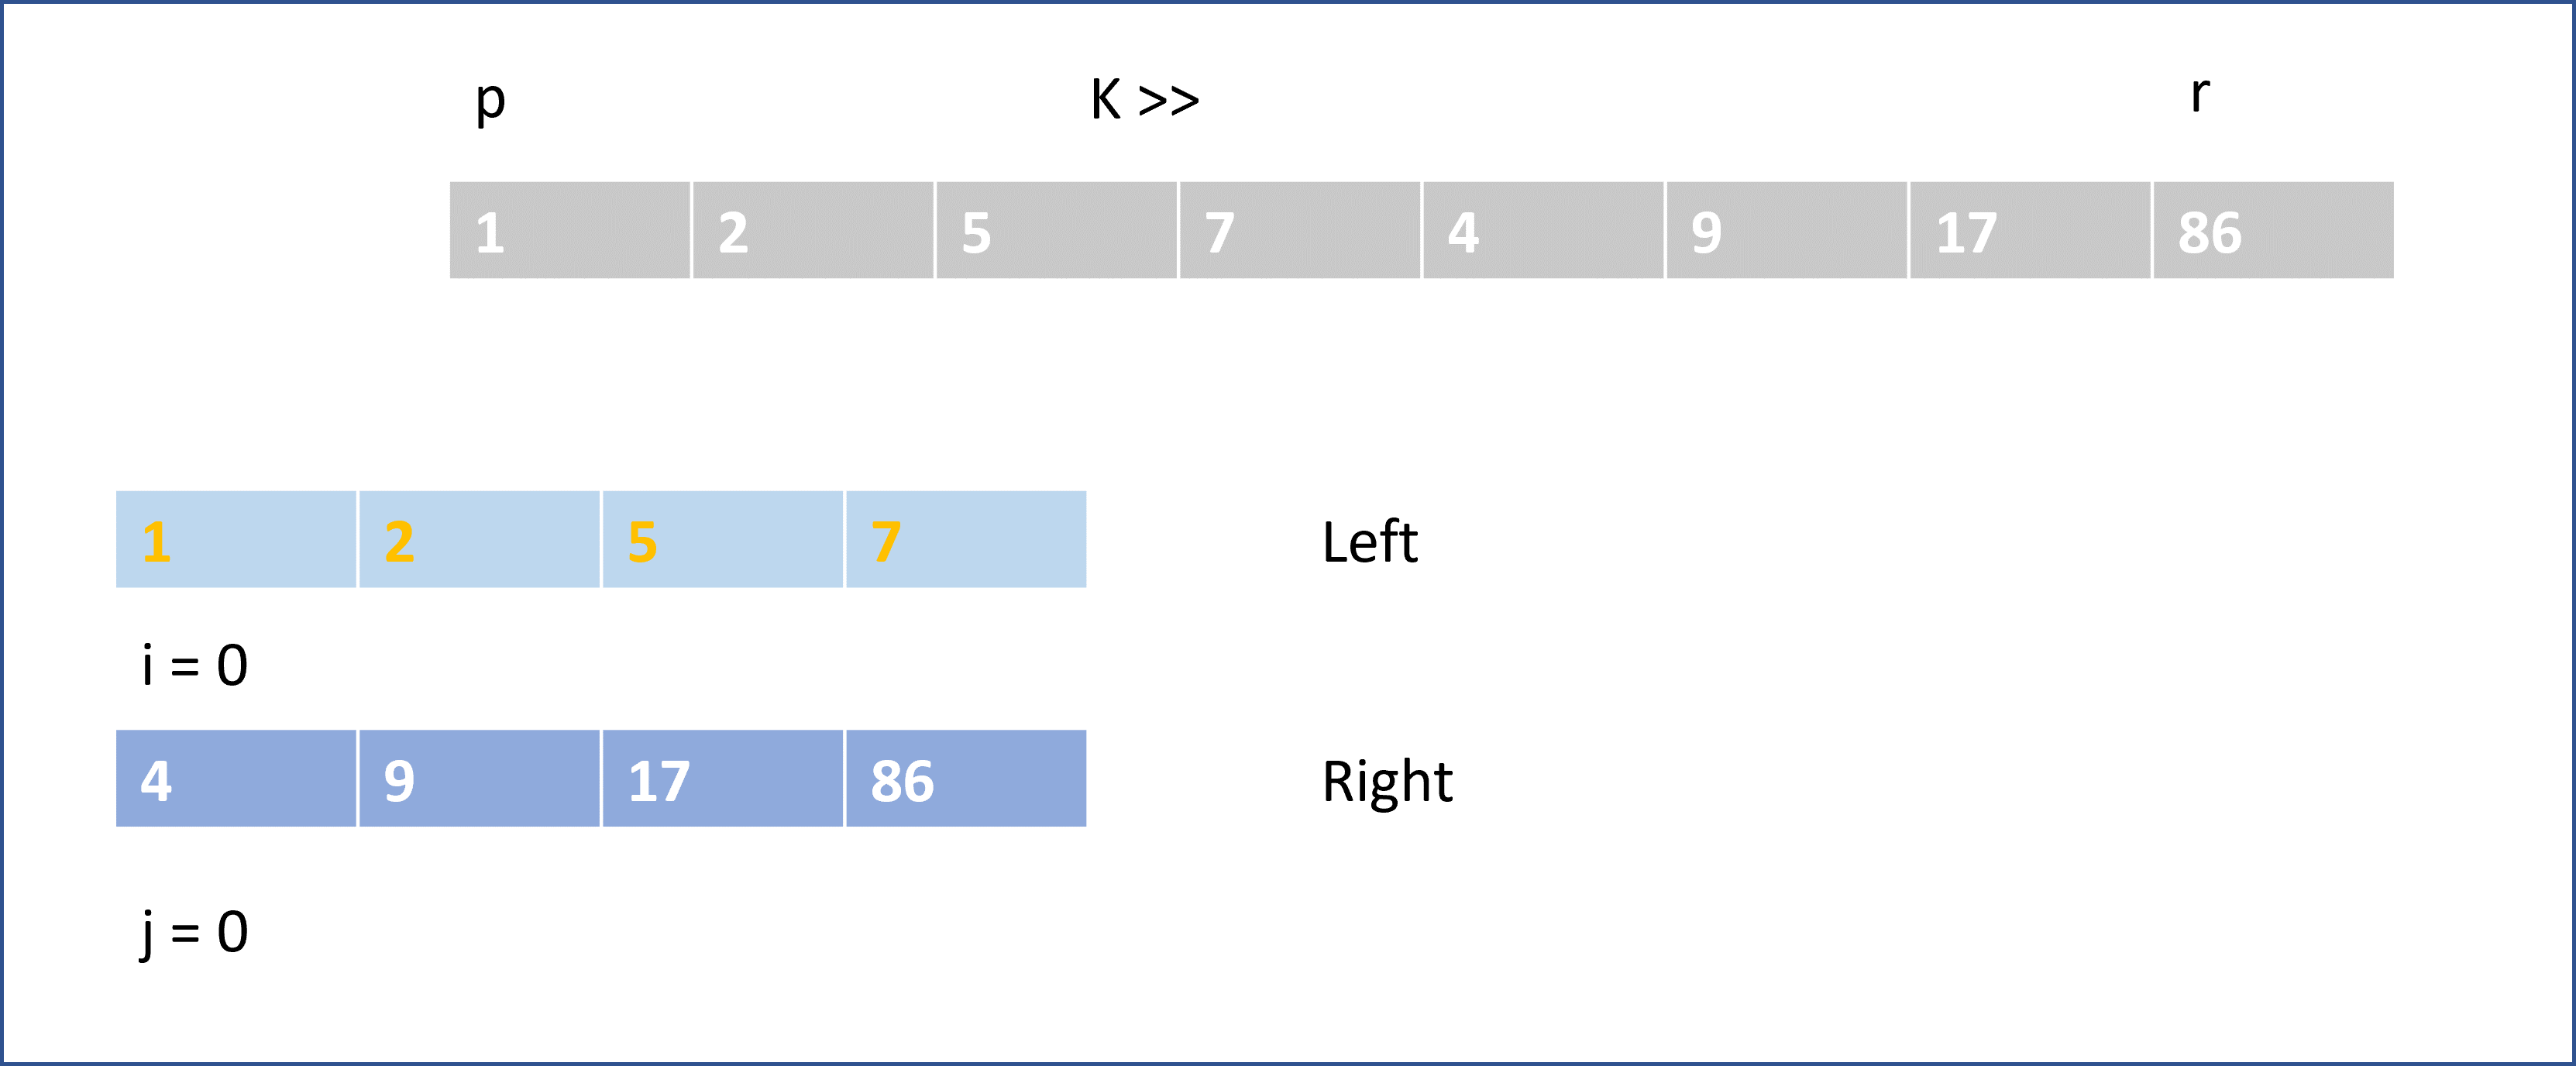

Los arreglos Left y Right se recorren con dos variables auxiliares, que llamaremos **i** y **j**, las cuales iniciaremos con valor 0, esto se realiza así, porque en la primera posición de los arreglos está la parte más pequeña de ellos y que de momento no se han copiado en orden en el arreglo G.



---
**Mantención:** Para comprobar que esto se mantendrá iremos comparando el Left[i] con Right[j], si uno llega a ser menor, se considera que es el menor no copiado en el arreglo G, se reemplaza el elemento en el arreglo original y se aumenta el i o j, esto para actualizar el nuevo menor elemento de la sub-lista, luego el bucle se actualiza iniciando otra iteración, esta acción se va repitiendo hasta iterar cada elemento del sub-arreglo y así manteniendo el bucle invariante.

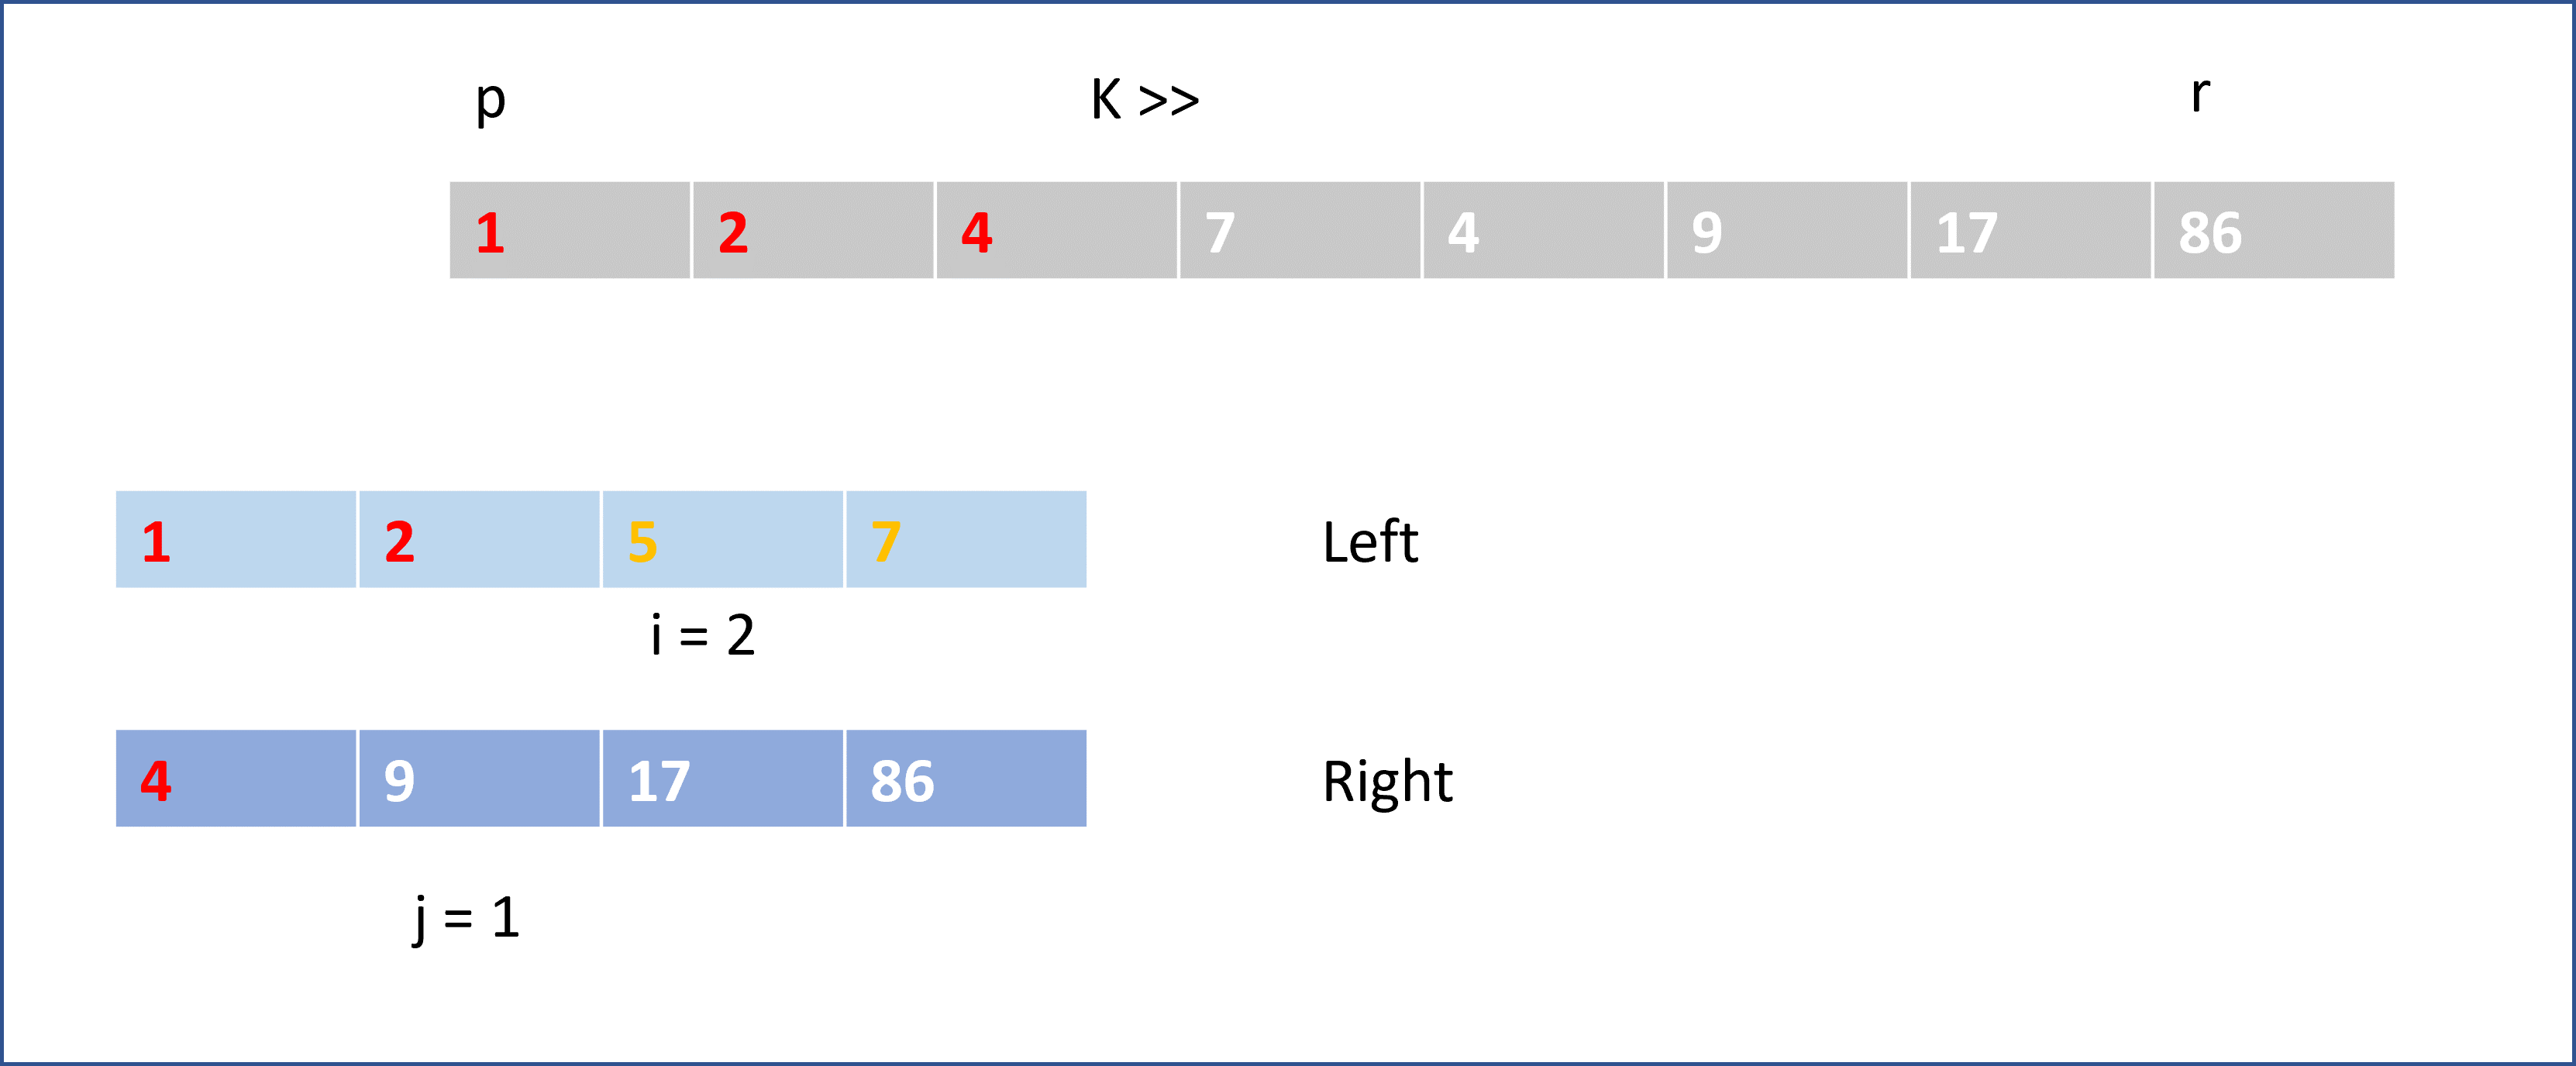

##3.2 Correctitud MergeSort

Teorema: El algoritmo MergeSort genera una lista ordenada a partir de los mismos elementos de esta.



Hipotesis para P(n): MergeSort retorna una lista ordenada de menor a mayor para **n** elementos.

**Caso base P(1)**: cuando n = 1, tenemos un único elemento a retornar y este se encuentra ordenado por razones obvias

**Paso inductivo**: Para los **n** elementos que hay en una lista, MergeSort va dividiendo el problema a la mitad con dos sub-listas y ordenando sus elementos.

      k = [n/2]  ;  k = [n/2]

Al ser k < n, se asume que estas sub-listas están en orden de menor a mayor y serán ordenadas correctamente. Según nuestro teorema del Merge, las sub-listas se ordenarán. En conclusión, MergeSort tiene un funcionamiento correcto y ordena la lista de **n** elementos.

##3.3 Tiempo de ejecución

Teorema: El algoritmo MergeSort tiene tiempo de ejecución O($n * log(n)$) en su peor caso.



Primero tengamos en cuenta para n elementos lo que hace el algoritmo de MergeSort, este va dividiendo en dos partes los n elementos, por tanto, para un problema T(n) en recursión, es equivalente a 2T(n/2) (La mitad del problema que se volverá a dividir entre dos, multiplicado por dos) más el caso actual que se puede representar como **cn** donde c es una constante, esta constante sirve también para representar la O(1) en su caso base cuando $n$ vale 1.

Finalmente, tenemos la función recursiva:

      T(n) = 2T(n/2) + cn ; n > 1
             O(1) ; n = 1

Visualmente tenemos esto:

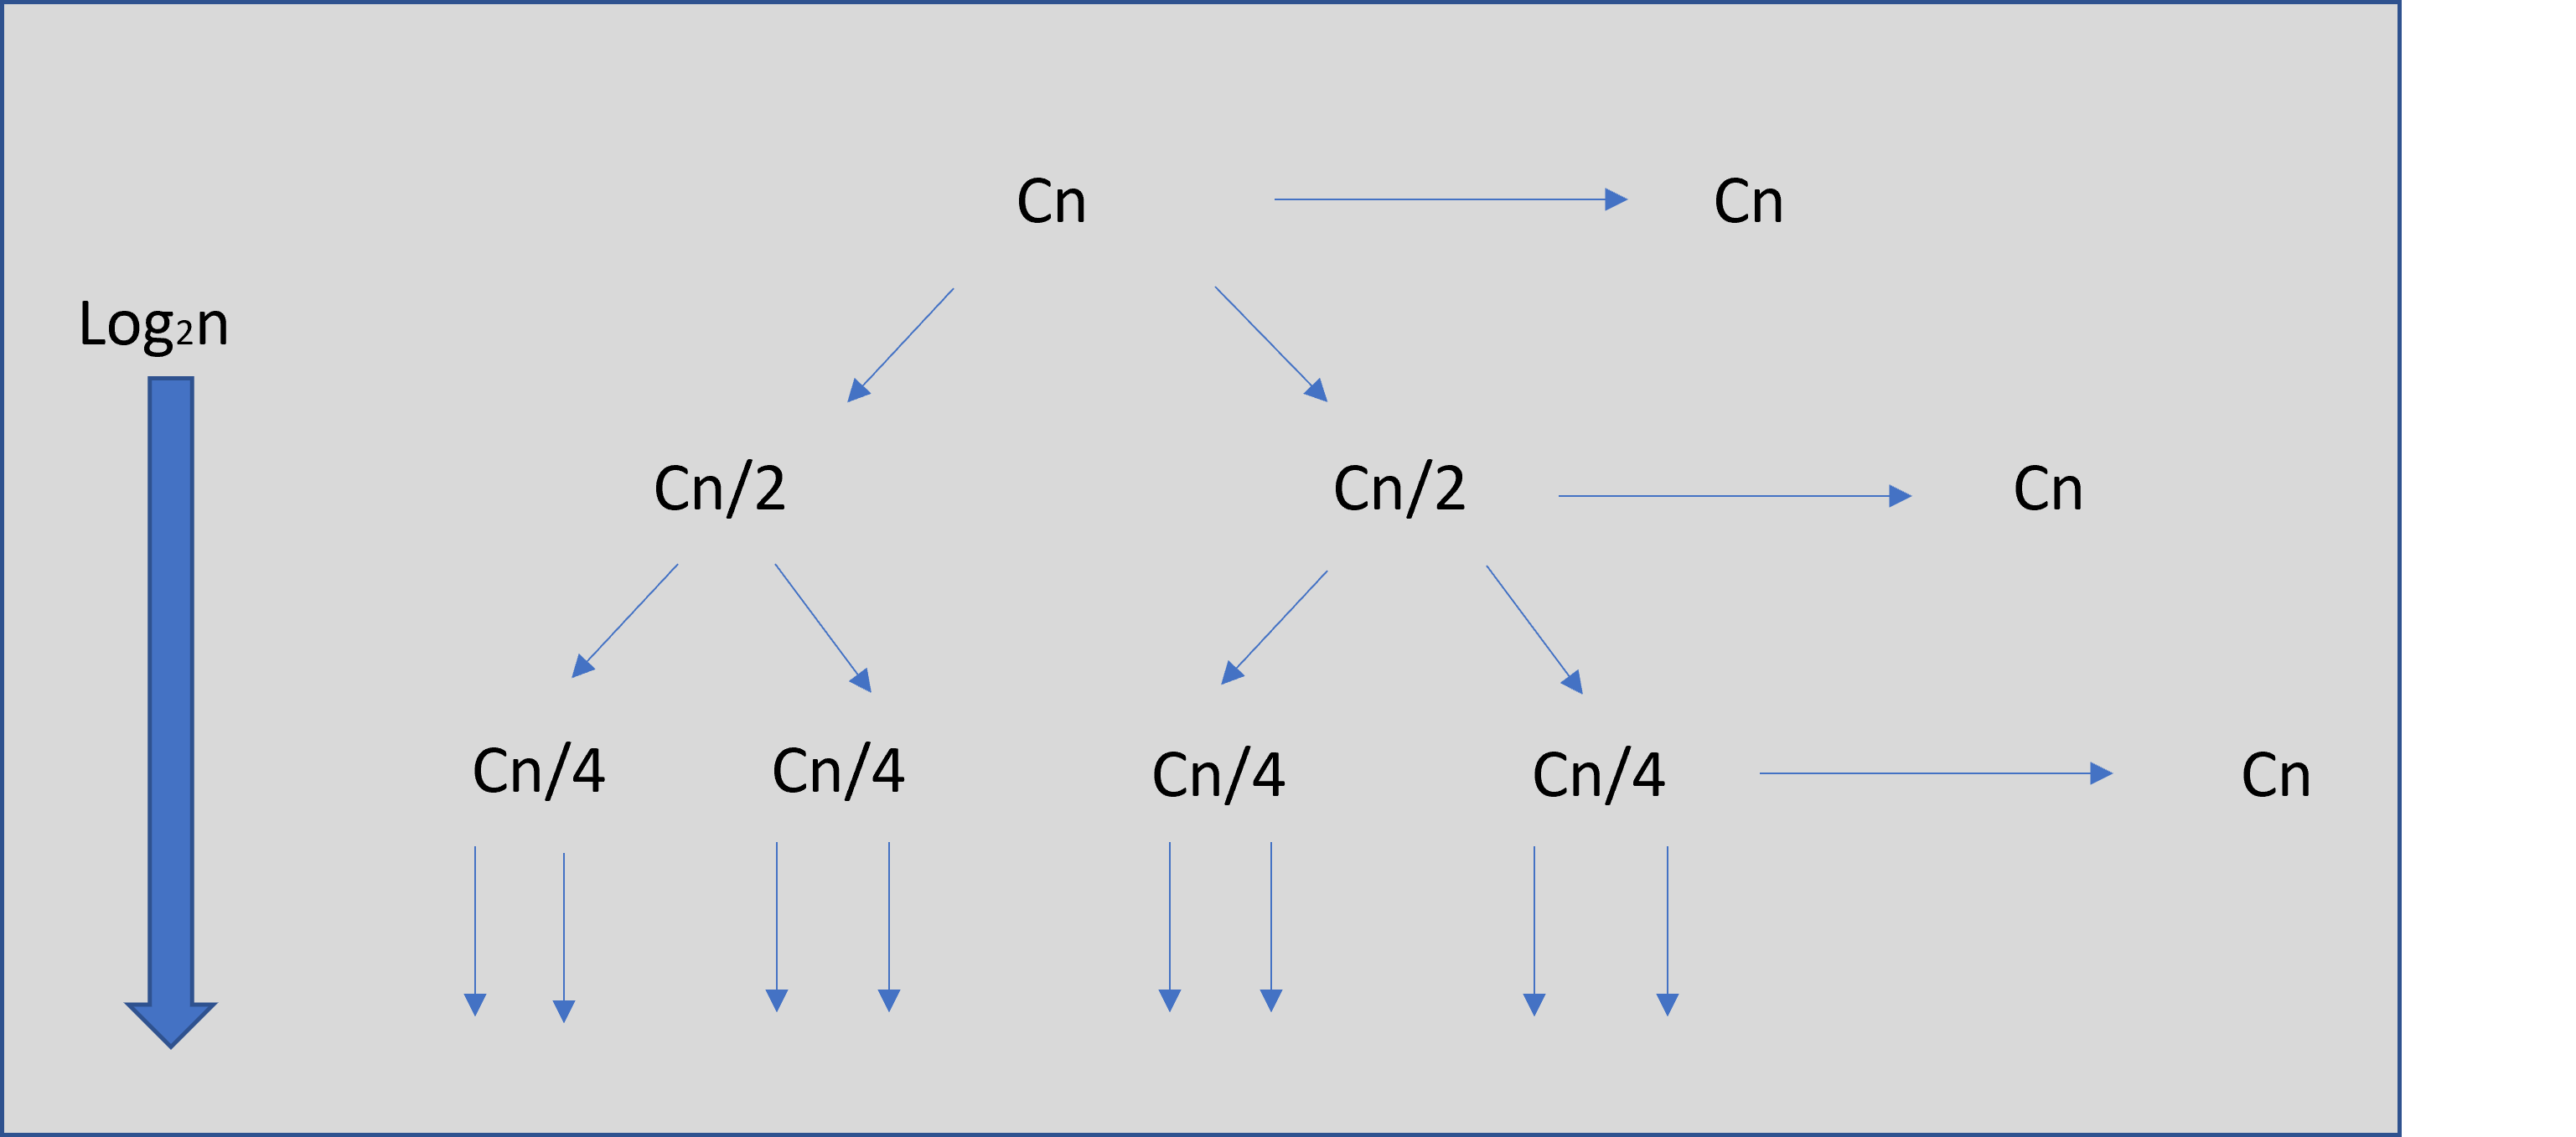

Explicado en palabras, el algoritmo recursivo MergeSort divide el problema en sub-problemas, y cada nivel de estos suman  *cn* y cada vez que divide tiene $log_2 (n) $ problemas.

En consecuencia, si multiplicamos ambos datos tenemos que el problema se ejecuta en un tiempo de $cn * log_2(n)$, por lo tanto, su complejidad temporal es O($n * log(n)$)

# **4. Experimentos**

## 4.1 Número de comparaciones

En la siguiente sección se hará una comparación entre el peor caso teórico del algoritmo MergeSort y casos experimentales para $n$ elementos.

Se debe tener en cuenta:

* $n$ se mueve entre 5 y 30, además que los números que contendrá irán desde 1 hasta 100.
* El peor caso y el mejor caso teóricamente son el mismo, así que, para representar cada uno, usaré las siguientes fórmulas respectivamente:

Peor caso: $n*log_2(n)$

Mejor caso: $n*log(n)$

In [81]:
import matplotlib.pyplot as plt
from math import log2

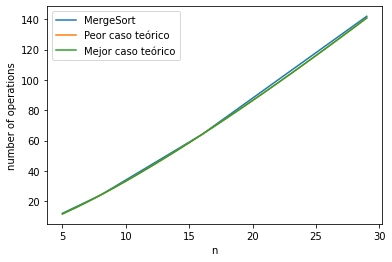

In [82]:
x=[n for n in range(5,30)] 
y1=[n*log2(n) for n in range(5,30)] # worst case
y2=[(n)*log2(n) for n in range(5,30)] # best case
y=[]; 

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teórico","Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

## Análisis de resultados

En el gráfico se puede apreciar, como el número de comparaciones experimental está entre los casos teóricos superior e inferior, demostrando que el MergeSort tiene comparaciones cercanas a los casos teóricos, por no decir iguales.

## 4.2 Tiempo de ejecución MergeSort

Para el siguiente análisis, se realizará una visualización del tiempo de ejecución en MergeSort para arreglos que se moverán entre 5 y 500 en su tamaño.

In [58]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

      1. Primera prueba.

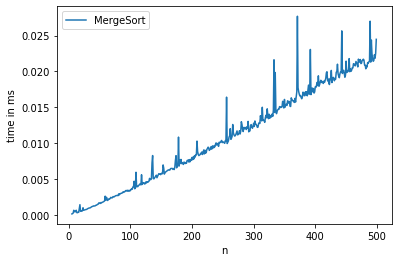

In [75]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

      2. Segunda prueba.

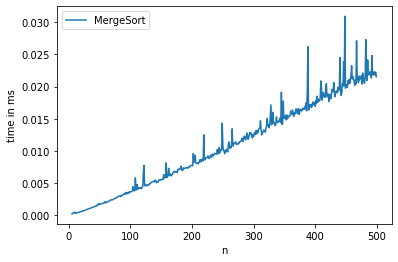

In [73]:
x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados

En las dos pruebas realizadas en el tiempo de ejecución con MergeSort, se pueden ver similitudes en sus tiempos de ejecución, los cuales corresponden a la complejidad propuesta teóricamente $O(n*log n)$.

Además, se puede apreciar, que en ambos gráficos hay picos muy resaltados, esto se puede deber principalmente a los arreglos aleatorios generados en un inicio, estos pueden afectar el rendimiento del MergeSort cuando son problemas muy grandes (Se realizaron múltiples ejecuciones para arreglos aleatorios y todos demostraron picos pronunciados en la curva del gráfico).

## 4.3 MergeSort vs InsertionSort (Comparaciones)

A continuación, se realizará un análisis en el número comparaciones que hay entre el algoritmo de MergeSort e Insertion Sort

Datos a tener en cuenta:

* $n$ esta entre 5 y 30 de tamaño y serán generados de forma aleatoria.

In [35]:
def InsertionSort(a,verbose=False):

    ## Inicializa una variable con el tamaño del arreglo
    n = len(a)
    iter = 0
    count = 0

    ##variable para obtener la media
    retr = 0

    for i in range(1,n):
      ## clave para realizar el intercambio
      key = a[i]

      ##Impresión de iteración
      iter+=1

      ## Ciclo que va desde [i:0]
      for j in range(i-1,-1,-1):
        count+=1

        ## Realización del intercambio de la clave y ruptura
        ## del ciclo
        if a[j]<key:
          a[j+1] = key
          break
        ## Intercambio general

        a[j+1] = a[j]
        retr+=1

      ## Intercambio general
      if key < a[0] : a[0] = key
    return a, count

      1. Primera prueba.

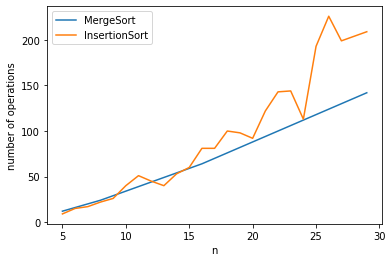

In [49]:
x=[n for n in range(5,30)] 
y=[] 
y1=[]

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  b,count=InsertionSort(b,False)
  y.append(contador)
  y1.append(count)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

      2. Segunda prueba.

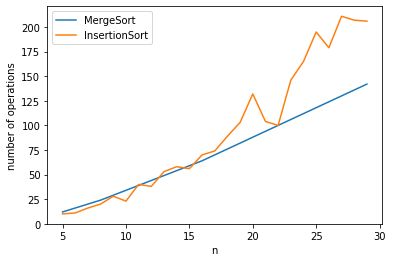

In [79]:
x=[n for n in range(5,30)] 
y=[] 
y1=[]

for n in range(5,30):
  global contador
  contador = 0
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)
  MergeSort(a,0,len(a)-1,Verbose=False)
  b,count=InsertionSort(b,False)
  y.append(contador)
  y1.append(count)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

##Analisis de resultados

Para ambas pruebas de los algoritmos, se demuestra que el MergeSort para casos grandes empieza a ser más eficientes en comparaciones en contraste con el InsertionSort.

## 4.4 MergeSort vs InsertionSort (Tiempo de ejecución)

Para nuestro último análisis, se realizará una comparación en el tiempo de ejecución que hay entre el algoritmo de MergeSort e Insertion Sort

Datos a tener en cuenta:

* $n$ esta entre 5 y 500 de tamaño y serán generados de forma aleatoria.

    1. Primera prueba

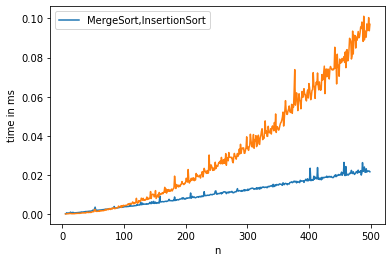

In [76]:
x=[]; y=[] ; y1 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({b})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort,InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

      2. Segunda prueba

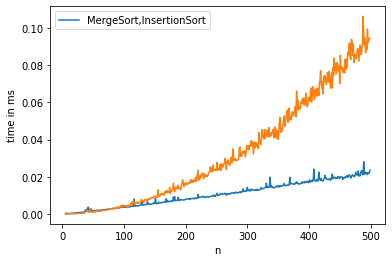

In [78]:
x=[]; y=[] ; y1 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({b})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort,InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados

Con las gráficas expuestas se comprueba que el tiempo de ejecución para MergeSort es más eficiente que el InsertionSort. En conclusión, MergeSort resulta ser increíblemente competente. 

## Enlaces consultados para realizar informe

https://chartreuse-goal-d5c.notion.site/MergeSort-13d9d94873ba4c589043c93650a768d2

https://en.wikipedia.org/wiki/Merge_sort

https://es.stackoverflow.com/questions/10768/crear-variables-globales-en-python#:~:text=Crear%20variables%20globales%20en%20Python%201%20local.%20No,funci%C3%B3n%20que%20puede%20utilizar%20su%20valor.%203%20Resumo%3A

https://es.wikipedia.org/wiki/Relaci%C3%B3n_de_recurrencia